In [ ]:
# Importing libraries that are required for the analysis

import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression

from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
# Reading the data file
df = pd.read_csv("/content/cars.csv")
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


# Exploratory Data Analysis

In [ ]:
df.shape
# 38531 cars data and 30 different columns

(38531, 30)

In [ ]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


In [ ]:
df.isnull().sum()
# Data is almost clean. Only engine_capacity has 10 null values

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [ ]:
# Data cleaning
df = df.dropna()
df.isnull().sum()

manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64

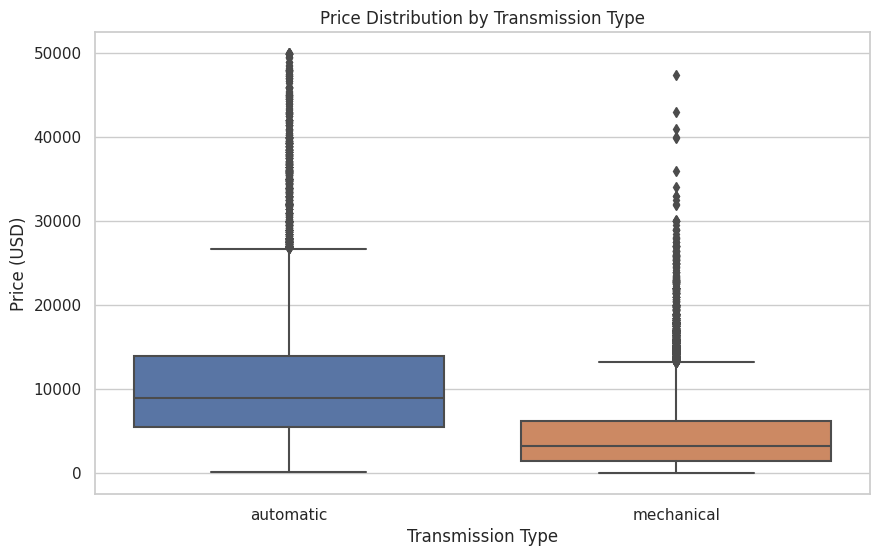

In [ ]:
# Boxplot of how price varies depending on the transmission type of Car (auto, manual).
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(x="transmission", y="price_usd", data=df)

plt.xlabel("Transmission Type")
plt.ylabel("Price (USD)")
plt.title("Price Distribution by Transmission Type")
plt.show()

<Axes: xlabel='color', ylabel='price_usd'>

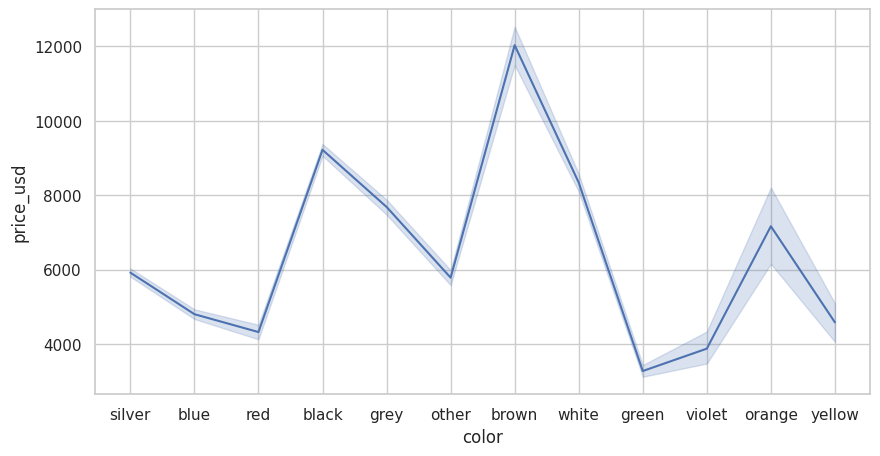

In [ ]:
# Average price of cars Vs color of the car.
plt.subplots(figsize = (10,5));
sns.lineplot(y='price_usd',x='color',data=df)

In [ ]:
df['car_age'] = 2023 - df['year_produced']
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,car_age
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,False,True,False,True,True,True,16,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,False,True,True,False,False,False,True,83,21
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,False,False,True,True,151,22
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,86,24
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,True,True,False,False,False,False,True,7,22


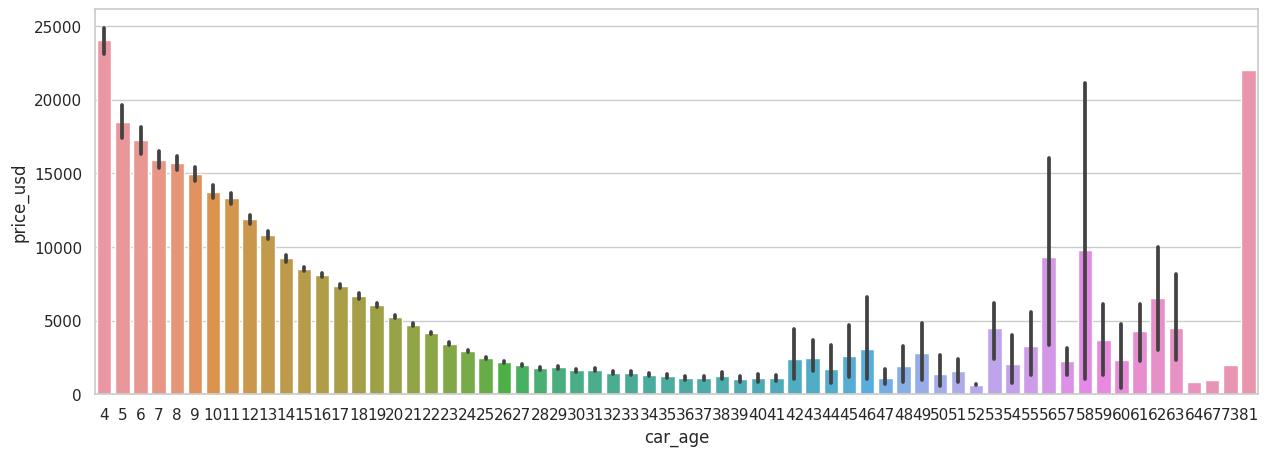

In [ ]:
# Age of the cars Vs Price of the cars
plt.figure(figsize=(15,5))
sns.barplot(y='price_usd', x='car_age', data=df)
plt.show()

# Generally, as age increases price decerease. But, after certain number years price rises.
# May be very old cars are vitage and rare

<Axes: xlabel='engine_fuel', ylabel='price_usd'>

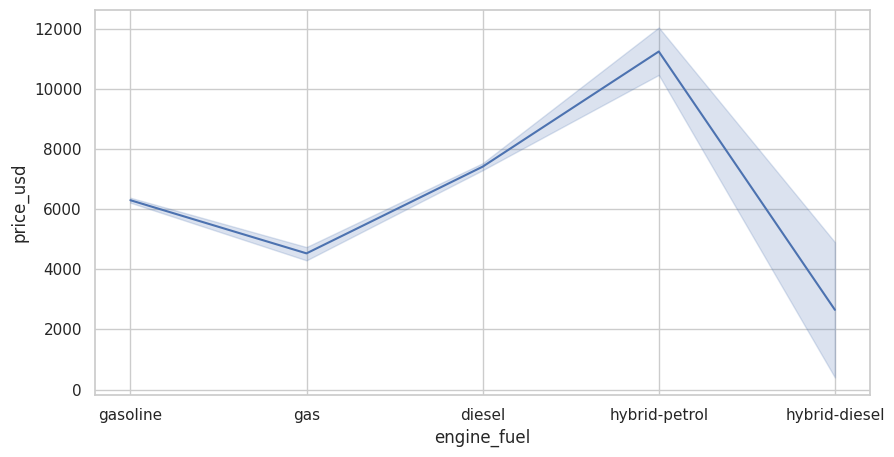

In [ ]:
# Engine type of the car Vs Average Price of the car of that engine type
plt.subplots(figsize = (10,5));
sns.lineplot(y='price_usd',x='engine_fuel',data=df)

# Observation: Electric cars are genrally high priced

<Axes: xlabel='engine_capacity', ylabel='price_usd'>

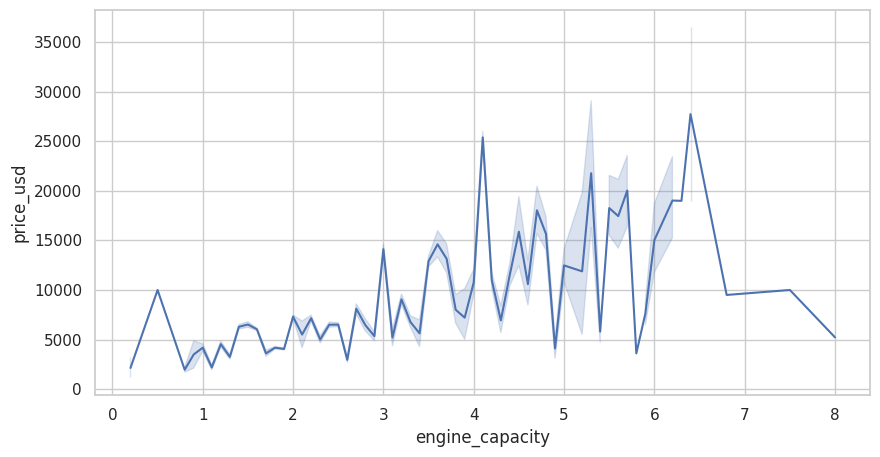

In [ ]:
# Engine capacity of the car Vs Average Price of that type of car
plt.subplots(figsize = (10,5));
sns.lineplot(y='price_usd',x='engine_capacity',data=df)

# Broadly speaking, as engine capacity increases price increases

In [ ]:
# Dropping unused features
df = df.drop(columns=['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9'], axis=1)
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,has_warranty,state,drivetrain,price_usd,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,car_age
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,owned,all,10900.00,False,Минская обл.,9,13,16,13
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,False,owned,all,5000.00,True,Минская обл.,12,54,83,21
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2800.00,True,Минская обл.,4,72,151,22
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,owned,all,9999.00,True,Минская обл.,9,42,86,24
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,False,owned,all,2134.11,True,Гомельская обл.,14,7,7,22


In [ ]:
df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
duration_listed        int64
car_age                int64
dtype: object

In [ ]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'duration_listed', 'car_age'],
      dtype='object')

In [ ]:
# Filtering out only numerical values for further analysis
numeric_values = df.select_dtypes(include= ['int64','float64'])
numeric_values

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,car_age
0,190000,2010,2.5,10900.00,9,13,16,13
1,290000,2002,3.0,5000.00,12,54,83,21
2,402000,2001,2.5,2800.00,4,72,151,22
3,10000,1999,3.0,9999.00,9,42,86,24
4,280000,2001,2.5,2134.11,14,7,7,22
...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,2750.00,5,85,301,23
38527,321000,2004,2.2,4800.00,4,20,317,19
38528,777957,2000,3.5,4300.00,3,63,369,23
38529,20000,2001,2.0,4000.00,7,156,490,22


In [ ]:
# Correlation and covariance are measure of how one variable is related another variable

# Covarience
covarience = df.cov(numeric_only=True)
covarience

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,car_age
odometer_value,1.851219e+10,-535968.161460,1443.064194,9652.861344,-2768.531890,-3.680119e+08,2754.361166,-119013.509709,-123556.479309,-7801.561321,535968.161460
year_produced,-5.359682e+05,65.040376,-0.110575,0.027382,0.181193,3.655424e+04,-0.223359,12.680589,2.780021,-15.393386,-65.040376
engine_has_gas,1.443064e+03,-0.110575,0.033746,0.010428,-0.000408,-7.374868e+01,0.001637,-0.035902,0.000442,0.378337,0.110575
engine_capacity,9.652861e+03,0.027382,0.010428,0.450479,-0.003932,1.279058e+03,0.026179,0.436302,2.299876,6.064931,-0.027382
has_warranty,-2.768532e+03,0.181193,-0.000408,-0.003932,0.011520,1.970629e+02,0.006041,0.054985,-0.107286,-0.748559,-0.181193
price_usd,-3.680119e+08,36554.239930,-73.748677,1279.058439,197.062917,4.128318e+07,-1.470561,12405.133063,15985.629080,24405.445627,-36554.239930
is_exchangeable,2.754361e+03,-0.223359,0.001637,0.026179,0.006041,-1.470561e+00,0.228275,0.301792,2.197325,1.451811,0.223359
number_of_photos,-1.190135e+05,12.680589,-0.035902,0.436302,0.054985,1.240513e+04,0.301792,37.122943,19.487419,-19.374957,-12.680589
up_counter,-1.235565e+05,2.780021,0.000442,2.299876,-0.107286,1.598563e+04,2.197325,19.487419,1874.178692,3410.345916,-2.780021
duration_listed,-7.801561e+03,-15.393386,0.378337,6.064931,-0.748559,2.440545e+04,1.451811,-19.374957,3410.345916,12732.544352,15.393386


In [ ]:
 # Correlation matrix
correlation = numeric_values.corr()
correlation

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,car_age
odometer_value,1.000000,-0.488448,0.105704,-0.420965,-0.143564,-0.020976,-0.000508,0.488448
year_produced,-0.488448,1.000000,0.005059,0.705439,0.258064,0.007963,-0.016916,-1.000000
engine_capacity,0.105704,0.005059,1.000000,0.296597,0.106691,0.079152,0.080081,-0.005059
price_usd,-0.420965,0.705439,0.296597,1.000000,0.316879,0.057470,0.033662,-0.705439
number_of_photos,-0.143564,0.258064,0.106691,0.316879,1.000000,0.073880,-0.028181,-0.258064
up_counter,-0.020976,0.007963,0.079152,0.057470,0.073880,1.000000,0.698128,-0.007963
duration_listed,-0.000508,-0.016916,0.080081,0.033662,-0.028181,0.698128,1.000000,0.016916
car_age,0.488448,-1.000000,-0.005059,-0.705439,-0.258064,-0.007963,0.016916,1.000000


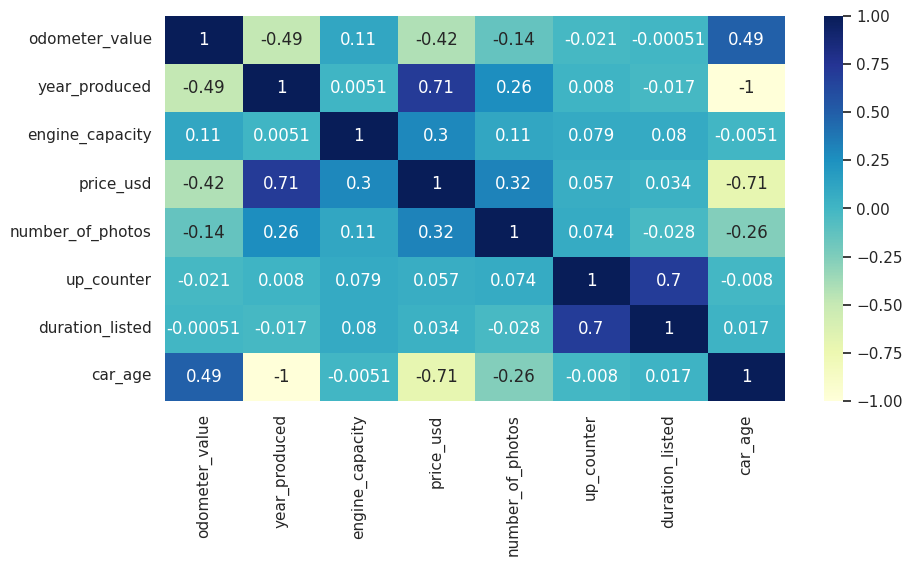

In [ ]:
# Figure size
plt.figure(figsize=(10,5))

# Heatmap
sns.heatmap(correlation, cmap="YlGnBu", annot=True)
plt.show()

# From the heatmap it is clear that, Price of the car has more correlation with year_produced and up_counter

[Text(0.5, 0, 'Engine Type'), Text(0, 0.5, 'Frequency of Engine type')]

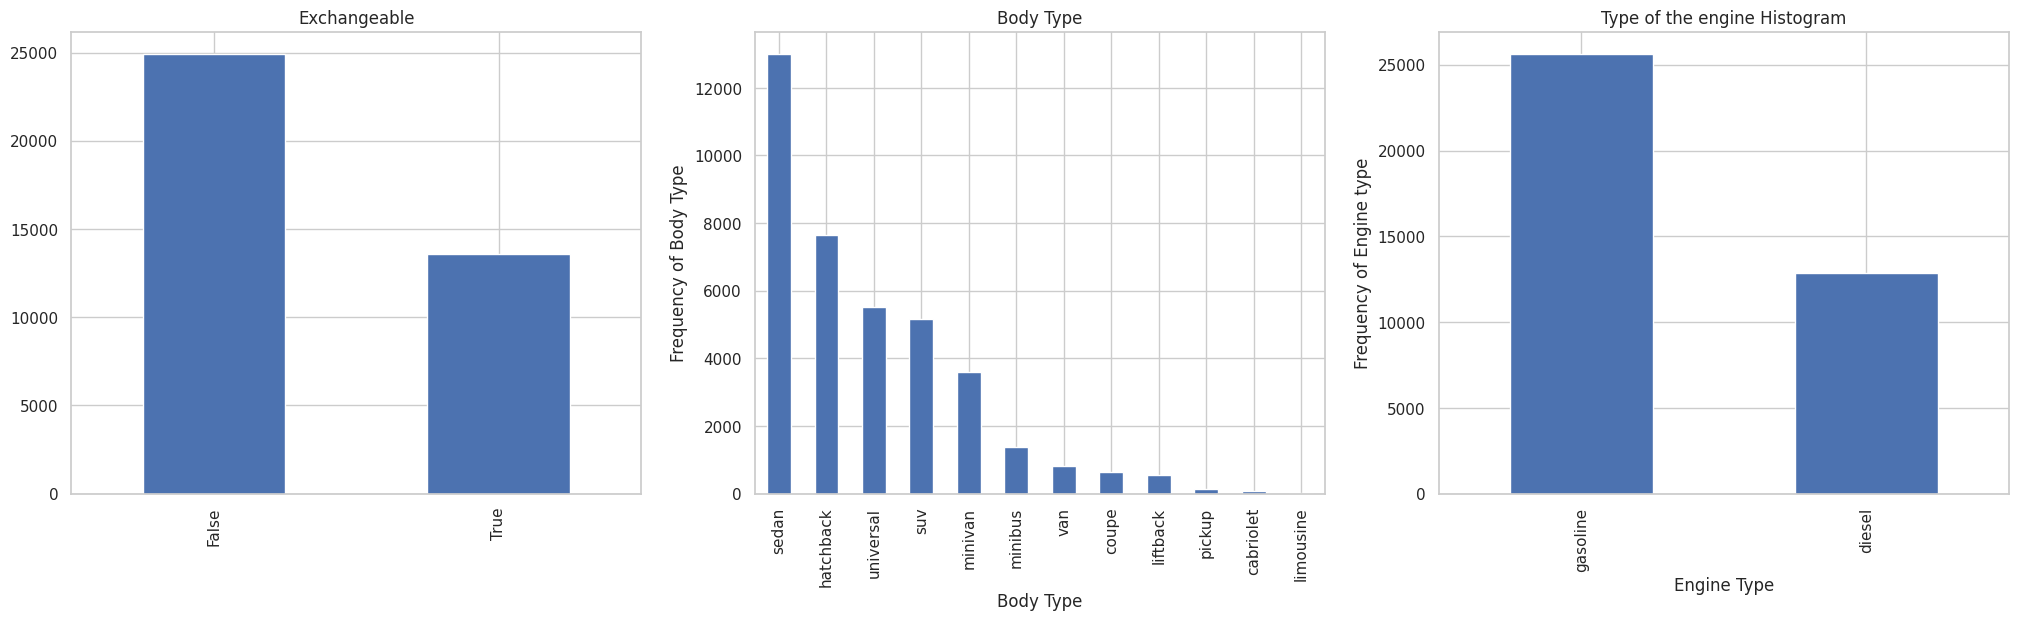

In [ ]:
# Histogram plot to understand the frequency of exchangeable, body_type, engine_type in the data

plt.figure(figsize=(25, 6))
plt.subplot(1,3,1)
plt1 = df.is_exchangeable.value_counts().plot(kind='bar')
plt.title('Exchangeable')
# Exchangeable cars are lower in number relatively

plt.subplot(1,3,2)
plt1 = df.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')
# Sedan is most frequent car in the data

plt.subplot(1,3,3)
plt1 = df.engine_type.value_counts().plot(kind='bar')
plt.title('Type of the engine Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')



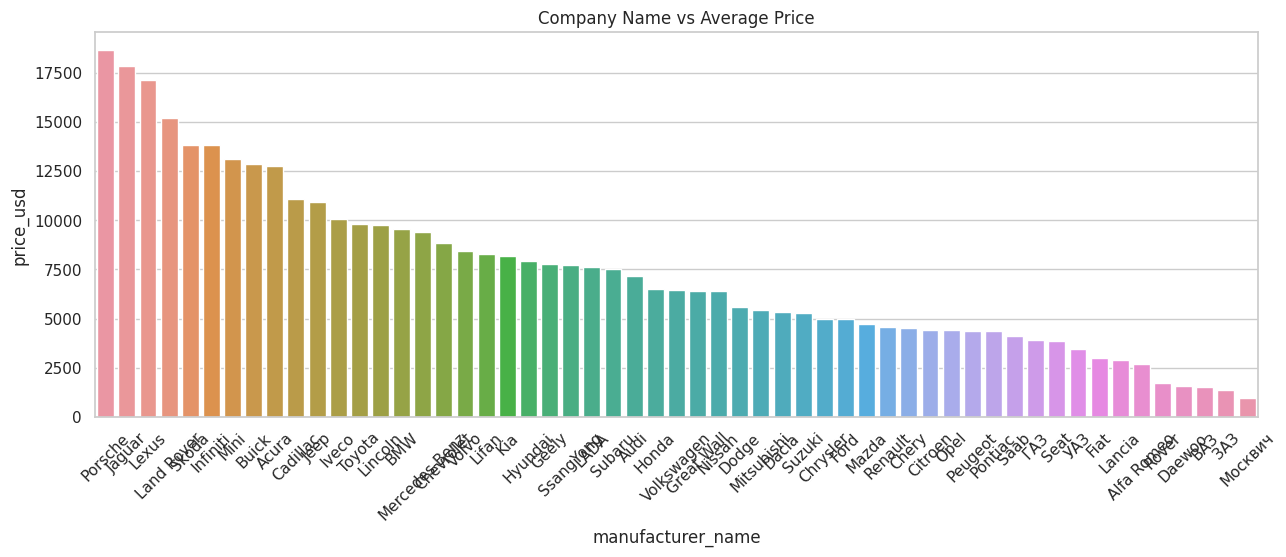

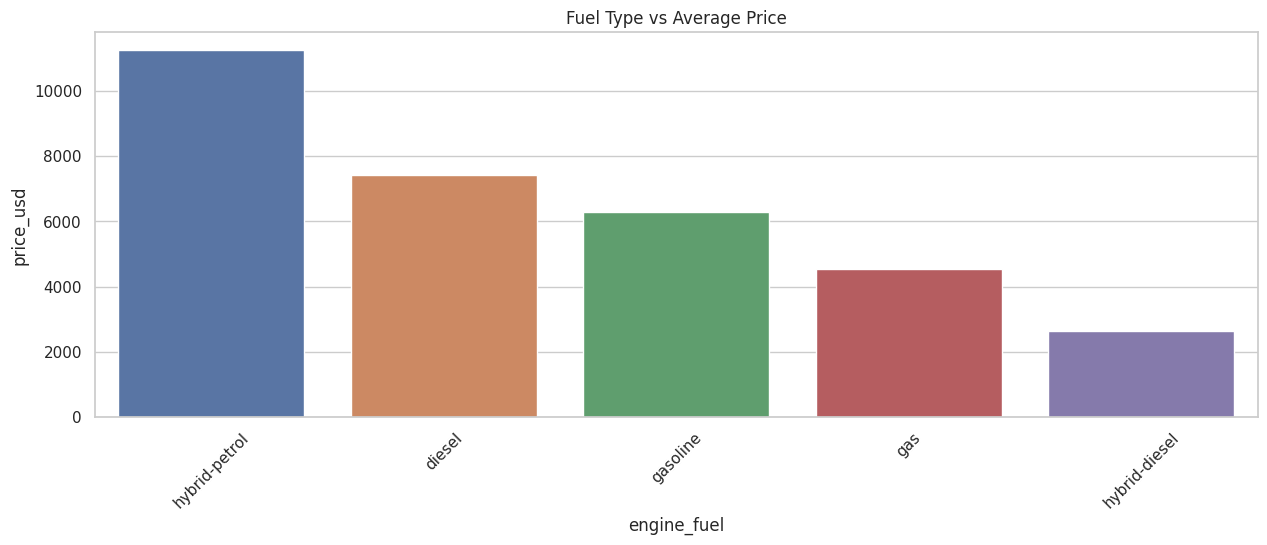

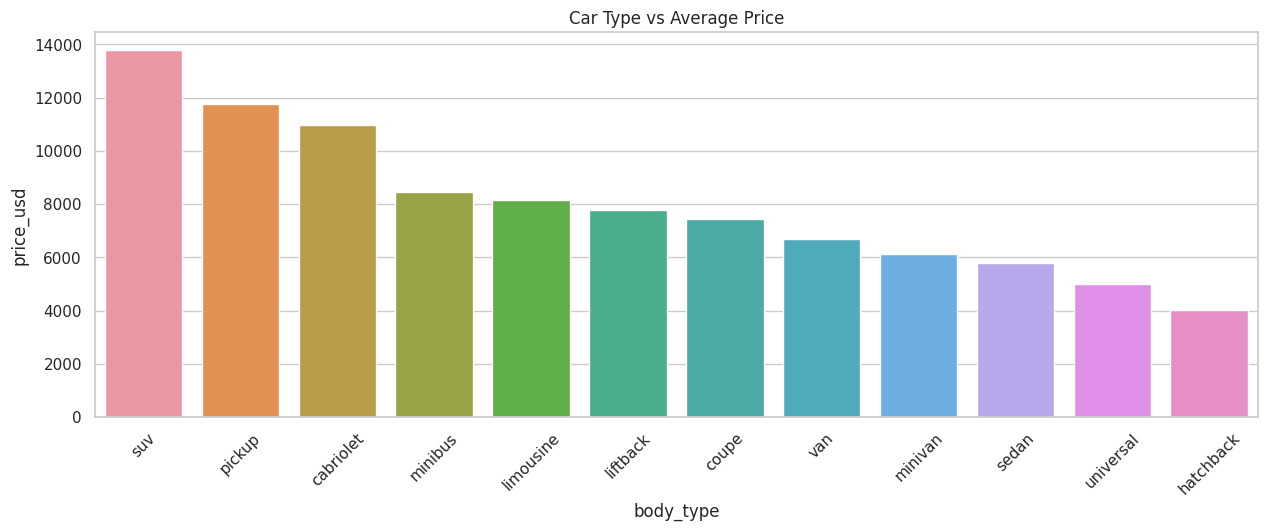

In [ ]:
# Histogram plot to understand the relation of brand of car, body-type, fuel-type with price

def create_bar_plot(data, x_column, y_column, title):
    df = pd.DataFrame(data.groupby([x_column])[y_column].mean().sort_values(ascending=False))
    plt.figure(figsize=(15, 5))
    sns.barplot(x=df.index, y=df[y_column])
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

create_bar_plot(df, 'manufacturer_name', 'price_usd', 'Company Name vs Average Price')
create_bar_plot(df,'engine_fuel', 'price_usd', 'Fuel Type vs Average Price')
create_bar_plot(df, 'body_type', 'price_usd', 'Car Type vs Average Price')

In [ ]:
# Converting string to float
df['price_usd'] = pd.to_numeric(df['price_usd'], errors='coerce')
df['car_age'] = pd.to_numeric(df['car_age'], errors='coerce')
df['price_usd'] = df['price_usd'].astype("float64")
df['car_age'] = df['car_age'].astype("float64")

df.dtypes

manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
duration_listed        int64
car_age              float64
dtype: object

In [ ]:
# categorizing cars into budget, medium, and high-end bins based on specified price ranges
duplicate_data = df.copy()
table = duplicate_data.groupby(['car_age'])['price_usd'].mean()
duplicate_data = duplicate_data.merge(table.reset_index(), how='left', on='car_age')
bins = [0,10000,25000,50000]
cars_bins = ['Budget','Medium', 'Highend']

In [ ]:
print(df.columns)

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'duration_listed', 'car_age'],
      dtype='object')


In [ ]:
duplicate_data.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,state,drivetrain,price_usd_x,is_exchangeable,location_region,number_of_photos,up_counter,duration_listed,car_age,price_usd_y
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,owned,all,10900.00,False,Минская обл.,9,13,16,13.0,10789.819888
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,owned,all,5000.00,True,Минская обл.,12,54,83,21.0,4723.385592
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,owned,all,2800.00,True,Минская обл.,4,72,151,22.0,4144.736959
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,owned,all,9999.00,True,Минская обл.,9,42,86,24.0,2945.195657
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,owned,all,2134.11,True,Гомельская обл.,14,7,7,22.0,4144.736959


In [ ]:
# Adding new binary column dropping and dropping orginal columns

def onehot_encode(df, columns, prefixes):
    df = df.copy()

    for column, prefix in zip(columns, prefixes):
       dummies = pd.get_dummies(df[column], prefix = prefix)
       df = pd.concat([df, dummies], axis=1)
       df = df.drop(column, axis = 1)
    return df
onehot_columns = [
    'manufacturer_name',
    'color',
    'engine_fuel',
    'body_type',
    'state',
    'drivetrain',
    'location_region'

]
onehot_prefixes = [
    'm',
    'c',
    'e',
    'b',
    's',
    'd',
    'l'

]

df = onehot_encode(df, onehot_columns, onehot_prefixes)

In [ ]:
print(df.columns)

Index(['model_name', 'transmission', 'odometer_value', 'year_produced',
       'engine_has_gas', 'engine_type', 'engine_capacity', 'has_warranty',
       'price_usd', 'is_exchangeable',
       ...
       's_owned', 'd_all', 'd_front', 'd_rear', 'l_Брестская обл.',
       'l_Витебская обл.', 'l_Гомельская обл.', 'l_Гродненская обл.',
       'l_Минская обл.', 'l_Могилевская обл.'],
      dtype='object', length=110)


In [ ]:
# replacing the value 'automatic' with 0 and 'mechanical' with 1
label_mapping = {
    'automatic': 0,
    'mechanical': 1
}
df['engine_type'] = df['transmission'].replace(label_mapping)
print(df.columns)

Index(['model_name', 'transmission', 'odometer_value', 'year_produced',
       'engine_has_gas', 'engine_type', 'engine_capacity', 'has_warranty',
       'price_usd', 'is_exchangeable',
       ...
       's_owned', 'd_all', 'd_front', 'd_rear', 'l_Брестская обл.',
       'l_Витебская обл.', 'l_Гомельская обл.', 'l_Гродненская обл.',
       'l_Минская обл.', 'l_Могилевская обл.'],
      dtype='object', length=110)


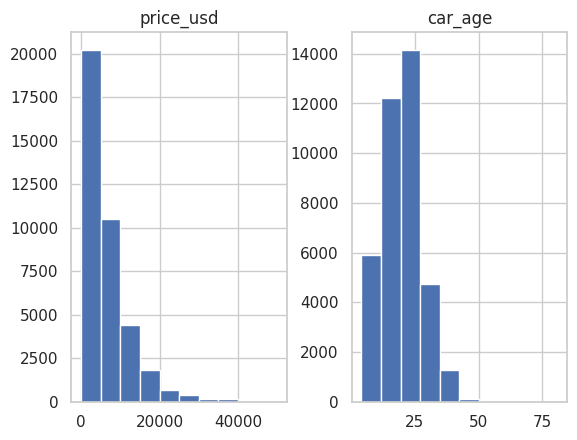

In [ ]:
# Distribution of price and age
df = df[['price_usd','car_age']]
df.hist()

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

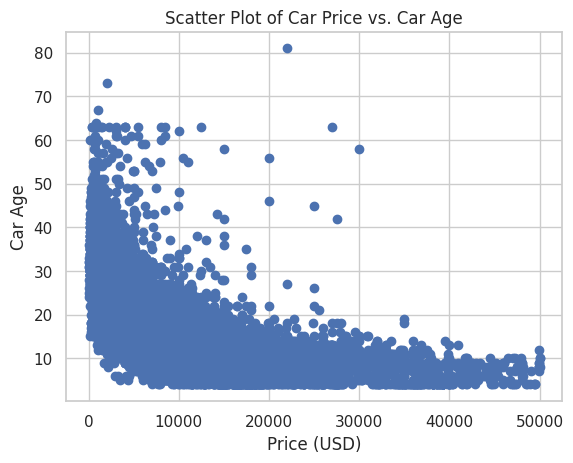

In [ ]:
x=df["price_usd"]
y=df["car_age"]
plt.scatter(x,y)
plt.title("Scatter Plot of Car Price vs. Car Age")
plt.xlabel("Price (USD)")
plt.ylabel("Car Age")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

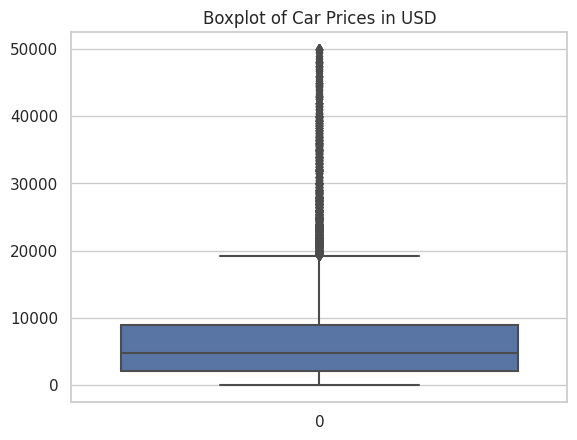

In [ ]:
plt1 = sns.boxplot(df['price_usd'])
plt1.set_title("Boxplot of Car Prices in USD")
plt.show

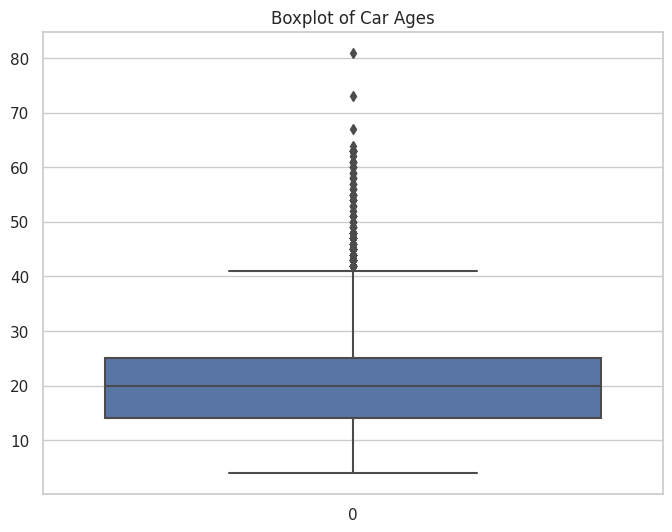

In [ ]:
plt.figure(figsize=(8, 6))

boxplot = sns.boxplot(df['car_age'])
boxplot.set_title("Boxplot of Car Ages")
plt.show()


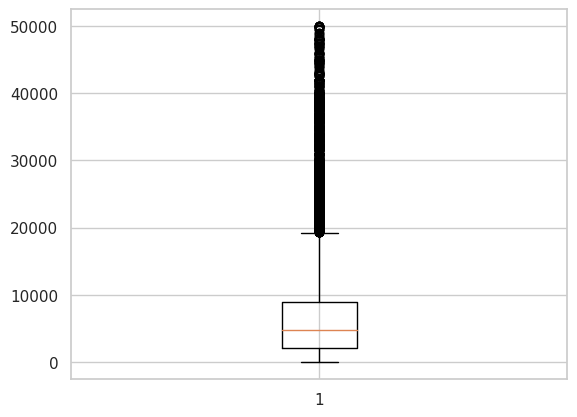

In [ ]:
plt.boxplot(df.price_usd)
Q1 = df.price_usd.quantile(0.25)
Q3 = df.price_usd.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price_usd >= Q1 - 1.5*IQR) & (df.price_usd <= Q3 + 1.5*IQR)]

# Linear Regression

In [ ]:
train = df.drop(["car_age"],axis =1)

In [ ]:
df.head()

,price_usd,car_age
0,10900.00,13.0
1,5000.00,21.0
2,2800.00,22.0
3,9999.00,24.0
4,2134.11,22.0


In [ ]:
# Create Dependent and Independent variables
X = df.drop(['price_usd'], axis=1)
y = df['price_usd']

# Split Data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# checking for shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(29416, 1)
(7355, 1)
(29416,)
(7355,)


In [ ]:
print(X)
print(y)

       car_age
0         13.0
1         21.0
2         22.0
3         24.0
4         22.0
...        ...
38526     23.0
38527     19.0
38528     23.0
38529     22.0
38530     23.0

[36771 rows x 1 columns]
0        10900.00
1         5000.00
2         2800.00
3         9999.00
4         2134.11
           ...   
38526     2750.00
38527     4800.00
38528     4300.00
38529     4000.00
38530     3200.00
Name: price_usd, Length: 36771, dtype: float64


In [ ]:
df.head()

,price_usd,car_age
0,10900.00,13.0
1,5000.00,21.0
2,2800.00,22.0
3,9999.00,24.0
4,2134.11,22.0


In [ ]:
df.columns

Index(['price_usd', 'car_age'], dtype='object')

In [ ]:
X.head()

,car_age
0,13.0
1,21.0
2,22.0
3,24.0
4,22.0


In [ ]:
# Creating LinearRegression object
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[-432.20281087]
14554.805853729886


# Cross Validation

In [ ]:
# the performance of the linear regression model on each of the 5 folds.
lm_cv_score = cross_val_score(lm, X_train, y_train, cv=5)
print(f"Linear Regression cross validation score: {lm_cv_score}")

# The performance of the model = ~60%

Linear Regression cross validation score: [0.59272488 0.58416611 0.57962632 0.59224774 0.5940196 ]


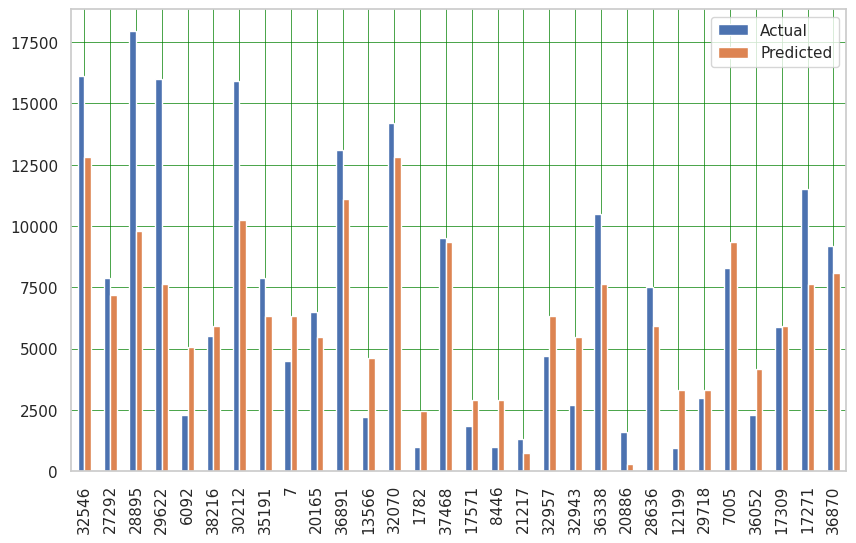

Mean Absolute Error: 2124.4126777025226
Mean Squared Error: 8000299.836470045
Root Mean Squared Error: 2828.480128349861
R² Score of testing lm-model: 0.5910749720174744


In [ ]:
y_pred = lm.predict(X_test)

# Create a dataset with actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Visualize the results
df1 = actual_vs_predicted.head(30)
df1.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Validation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² Score of testing lm-model: ' + str(lm.score(X_test, y_test)))

In [ ]:
train["predicted_value"] = lm.predict(X)

In [ ]:
print(train)

       price_usd  predicted_value
0       10900.00      8936.169312
1        5000.00      5478.546826
2        2800.00      5046.344015
3        9999.00      4181.938393
4        2134.11      5046.344015
...          ...              ...
38526    2750.00      4614.141204
38527    4800.00      6342.952447
38528    4300.00      4614.141204
38529    4000.00      5046.344015
38530    3200.00      4614.141204

[36771 rows x 2 columns]


my car age is 5 years so converting this value to the normalisation using min max scalar

In [ ]:
my_car = pd.DataFrame({
    'car_age':[6]
})

In [ ]:
new_pred = lm.predict(my_car)

print('The predicted price for my property is: ' + str(new_pred))

The predicted price for my property is: [11961.58898852]


# Independent T-test

In [ ]:
df = pd.read_csv("/content/cars.csv")
df.head()
df['transmission'].unique()

array(['automatic', 'mechanical'], dtype=object)

In [ ]:

# Separate data into two groups based on transmission
automatic_prices = df[df['transmission'] == 'automatic']['price_usd']
mechanical_prices = df[df['transmission'] == 'mechanical']['price_usd']

# Perform independent t-test
t_statistic, p_value = ttest_ind(automatic_prices, mechanical_prices)

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Check the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in prices between automatic and mechanical transmissions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in prices between automatic and mechanical transmissions.")

T-statistic: 106.3603568379546
P-value: 0.0
Reject the null hypothesis: There is a significant difference in prices between automatic and mechanical transmissions.


# Boostrapping

In [ ]:
price_usd_data = df['price_usd'].dropna().values

# Function to perform bootstrapping and return the mean
def bootstrap_mean(data, num_samples=1000):
    bootstrap_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(num_samples)]
    return bootstrap_means

# Perform bootstrapping
bootstrap_means = bootstrap_mean(price_usd_data)

# Calculate confidence intervals or other statistics as needed
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print(f"Bootstrap Mean: {np.mean(bootstrap_means)}")
print(f"95% Confidence Interval: {confidence_interval}")

Bootstrap Mean: 6639.960779603955
95% Confidence Interval: [6576.56078112 6701.9212307 ]


# One-way Anova

In [ ]:
categories = df['engine_fuel'].unique()
categories

array(['gasoline', 'gas', 'diesel', 'hybrid-petrol', 'hybrid-diesel',
       'electric'], dtype=object)

In [ ]:
anova_results = {}

for category in categories:
    subset = df[df['engine_fuel'] == category]['price_usd']
    anova_results[category] = subset

f_statistic, p_value = f_oneway(*anova_results.values())

# Print the results
print(f'P-value: {p_value}')

# Check the significance level (commonly 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in prices across engine fuel categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in prices across engine fuel categories.")

P-value: 2.6553488339685534e-117
Reject the null hypothesis: There is a significant difference in prices across engine fuel categories.


# Two-way Anova

In [ ]:
# Fit the two-way ANOVA model
model = ols('price_usd ~ C(engine_fuel) * C(transmission)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                                      sum_sq       df             F  \
C(engine_fuel)                  5.119082e+10      5.0    332.404322   
C(transmission)                 3.804777e+11      1.0  12353.038744   
C(engine_fuel):C(transmission)  3.803814e+09      5.0     24.699828   
Residual                        1.186429e+12  38520.0           NaN   

                                       PR(>F)  
C(engine_fuel)                  9.060141e-282  
C(transmission)                  0.000000e+00  
C(engine_fuel):C(transmission)   1.882808e-20  
Residual                                  NaN  


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 4
  warnings.warn('covariance of constraints does not have full '


From the p-values (PR(>F)), you can make decisions about the statistical significance of each effect:

C(engine_fuel): The p-value is very close to zero (9.060141e-282), indicating a highly significant effect of engine_fuel on price_usd.

C(transmission): The p-value is also very close to zero (0.000000e+00), indicating a highly significant effect of transmission on price_usd.

C(engine_fuel):C(transmission): The interaction effect also has a low p-value (1.882808e-20), suggesting a significant interaction effect between engine_fuel and transmission on price_usd.

Residual: The NaN in the p-value column for 'Residual' is expected, as this represents the unexplained variance, and there is no hypothesis test for it.

In conclusion, based on these p-values, it seems that both engine_fuel and transmission have a significant impact on the price_usd, and there is also a significant interaction effect between them.